In [1]:
from my_sort import InfinitesimalSort, NaiveInfinitesimalSort
import numpy as np
optimal = InfinitesimalSort()
naive = NaiveInfinitesimalSort()

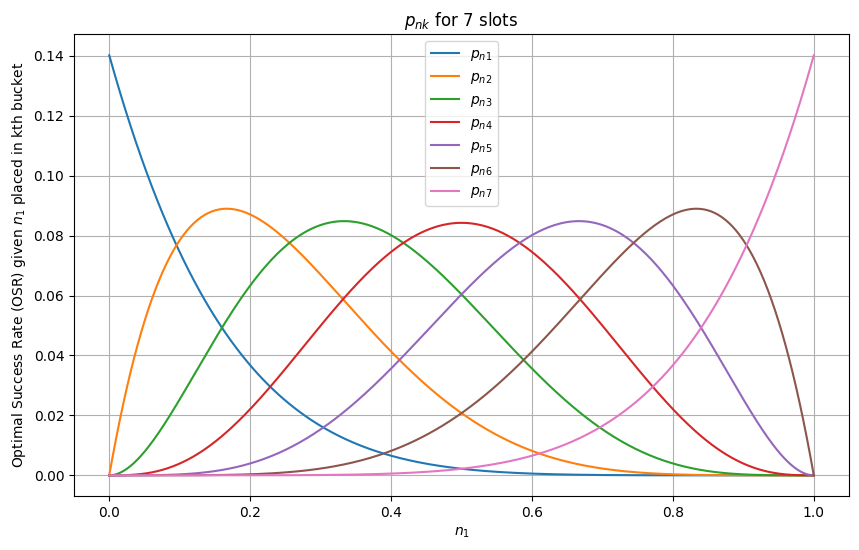

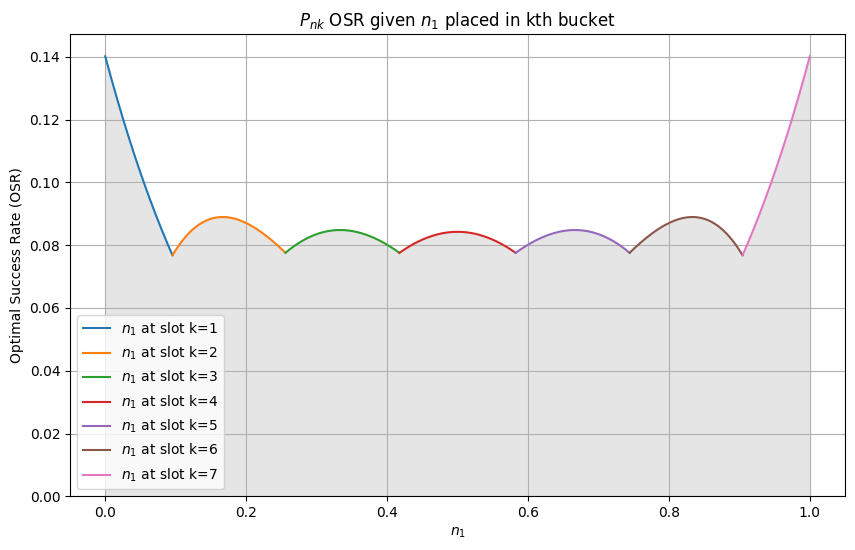

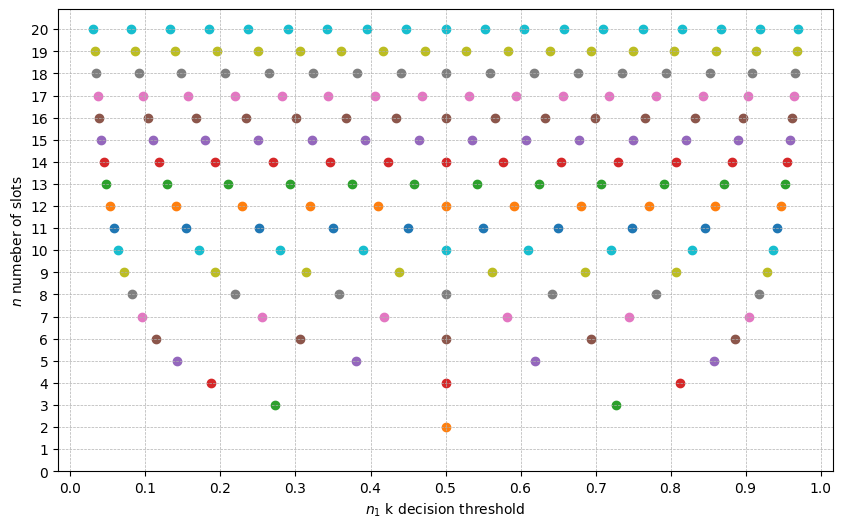

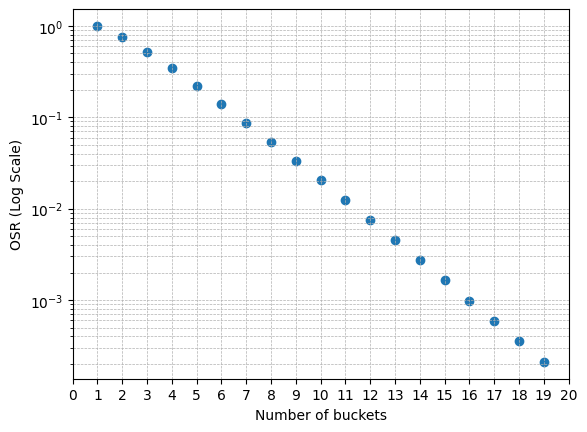

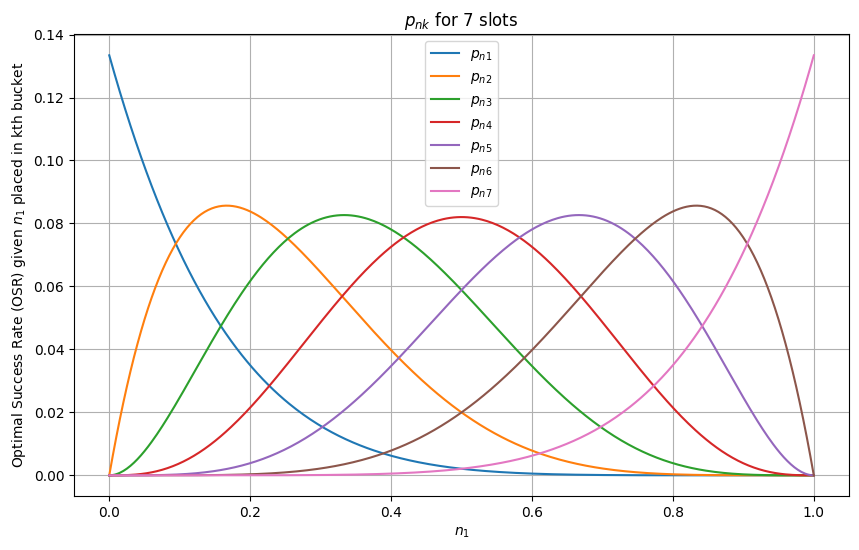

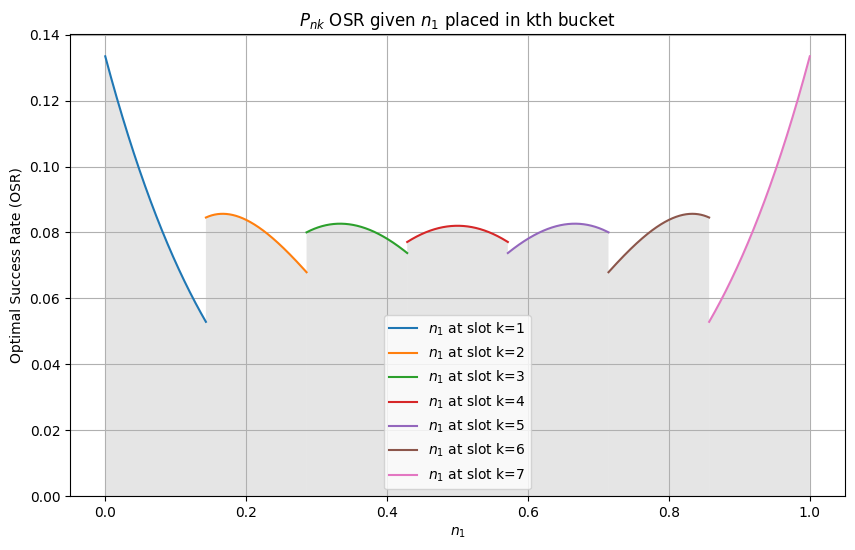

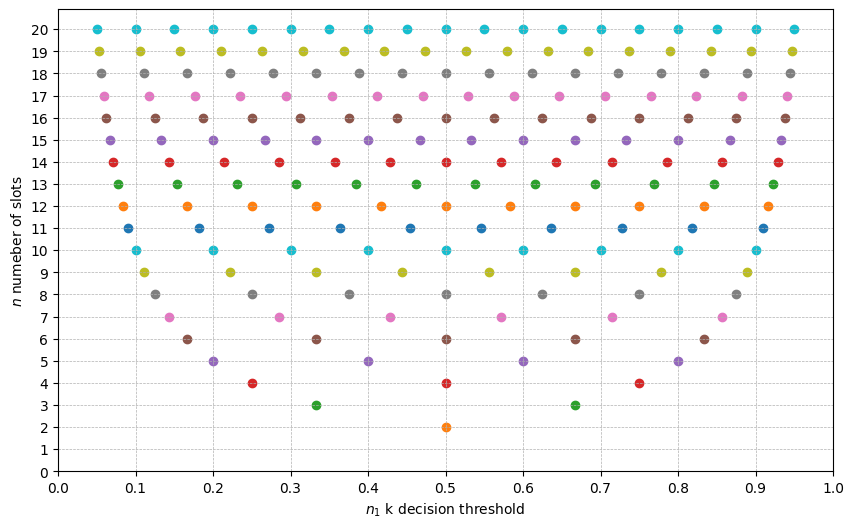

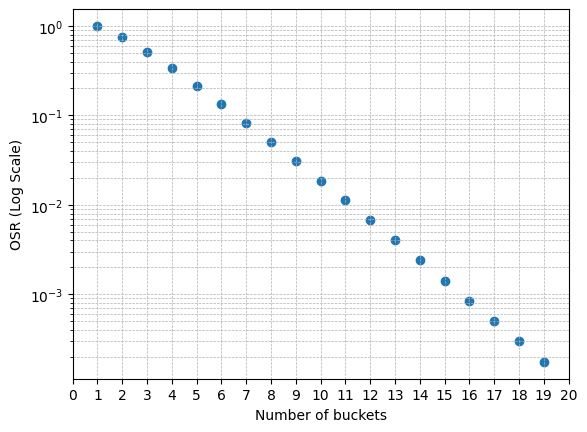

In [2]:
optimal.plot_strategy_domains(7)
optimal.plot_strategy_domains_at_optimal_range(7)
optimal.plot_partition_tree(20)
optimal.plot_OSR(20)
naive.plot_strategy_domains(7)
naive.plot_strategy_domains_at_optimal_range(7)
naive.plot_partition_tree(20)
naive.plot_OSR(20)

In [34]:
from sort_analyzer import index_from_tresholds, disorder, quasi_sort_dir, plot_sort_analiysis,index_from_tresholds, best_quasi_sort
from matplotlib import pyplot as plt

ImportError: cannot import name 'best_quasi_sort' from 'sort_analyzer' (/home/pablo/Documents/code/jupyter/sort_analyzer.py)

In [35]:
def best_quasi_sort(arr, tresholds= None):
    ''' Uses thresholds to sort the array into slots, if slot occupied,'''
    arr = np.array(arr)
    n = len(arr)
    slots = np.zeros(n)
    if tresholds is None:
        tresholds = InfinitesimalSort().thresholds(n)[1] 

    for i, ni in enumerate(arr):
        idx = index_from_tresholds(tresholds, ni)
        if slots[idx] != 0:
            slots[slots == 0] = best_quasi_sort(arr[i:])
            break
        else:
            slots[idx] = ni
    return slots

In [57]:
np.array([0.03, 0 , 0.1, 0.2, 0, 0 , 0.9])

array([0.03, 0.  , 0.05, 0.  , 0.  , 6.  ])

In [82]:
def start_end_l_r(slots, idx):
    """ finds the start and end of the sub-problem looking left and right from the index"""
    idx_s = idx-1
    idx_e = idx+1
    # move left till find non zero
    while (slots[idx_s] == 0) and (idx_s > 0):
        idx_s -= 1
    
    # move right till find non zero
    while (slots[idx_e] == 0) and (idx_e < len(slots)):
        idx_e += 1

    start = slots[idx_s] if idx_s != 0 else 0
    end = slots[idx_e] if idx_e != len(slots) else 1
    return idx_s, start , idx_e, end

def start_end_r(slots, idx):
    """ starts at a index that is occupied and moves to the right till it finds a non zero 
    then it finds the next non zero"""

    # not handled yet the border cases
    idx_s = idx+1
    while (slots[idx_s] != 0) and (idx_e < len(slots)):
        idx_s += 1
    idx_e = idx_s+1
    while (slots[idx_s] == 0) and (idx_e < len(slots)):
        idx_e += 1
    
    return idx_s, slots[idx_s] , idx_e, slots[idx_e]

def start_end_l(slots, idx):
    """ starts at a index that is occupied and moves to the right till it finds a non zero 
    then it finds the next non zero"""
    idx_s = idx-1
    while (slots[idx_s] != 0) and (idx_e > 0):
        idx_s += 1
    idx_e = idx_s+1
    while (slots[idx_s] == 0) and (idx_e > 0):
        idx_e += 1
    
    return idx_s, slots[idx_s] , idx_e, slots[idx_e]

In [ ]:
def best_quasi_sort(arr, tresholds= None):
    ''' Uses thresholds to sort the array into slots, if slot occupied,'''
    arr = np.array(arr)
    n = len(arr)
    slots = np.zeros(n)
    if tresholds is None:
        tresholds = InfinitesimalSort().thresholds(n)[1] 
    
    # first placement
    idx = index_from_tresholds(tresholds, ni) 
    slots[idx] = arr[0]

    for i, ni in enumerate(arr[1:]):
        # best entry point wiothout saving information
        idx = index_from_tresholds(tresholds, ni) 
        if slots[idx] == 0:
            idx_s, start , idx_e, end = start_end_l_r(slots, idx)
        elif slots[idx] < ni:
            # move to the right
            idx_s, start , idx_e, end = start_end_r(slots, idx)
        else: #  slots[idx] >ni:
            # move to the left
            idx_s, start , idx_e, end = start_end_l(slots, idx)
        
    return slots

In [ ]:
idx = index_from_tresholds(tresholds, ni) # best entry point wiothout saving information
if slots[idx] == 0:
    idx_s, start , idx_e, end = start_end_l_r(slots, idx)
elif slots[idx] < ni:
    # move to the right
    idx_s, start , idx_e, end = start_end_r(slots, idx)
else: #  slots[idx] >ni:
    # move to the left
    idx_s, start , idx_e, end = start_end_l(slots, idx)


In [81]:
start_end_l_r([0,0,0,0.1,0.2,0.3,0,0,0,0,0,0.5], 7)

(5, 0.3, 11, 0.5)

In [83]:
def placeit(slots, ni):
    pass

def best_quasi_sort(arr, tresholds):
    ''' Uses thresholds to sort the array into slots, if slot occupied,'''
    arr = np.array(arr)
    n = len(arr)
    slots = np.zeros(n)
    if tresholds is None:
        tresholds = InfinitesimalSort().thresholds(n)[1] 

    for i, ni in enumerate(arr):
        idx = index_from_tresholds(tresholds, ni)
        if idx == 0:
            # fist element
            slots[idx] = ni
            continue
        else:
            # subarray

            slots[(slots == 0) & (slots == 0)] = placeit(slots, ni)
            break

    return slots

In [87]:
a = np.array([0,0,0,0.1,0.2,0.3,0,0,4,0,0,0.5])

In [100]:
a = np.array([1,3,5,0,0,0,7,8,10])

In [ ]:
np.argwhere(a==0 and np.argwhere(a==1)[-1][0])

In [102]:
import numpy as np

def find_slots(arr, n):
    # Check for the edge case where the entire array is zero or where the number could fit at the beginning or end
    if np.all(arr == 0):
        return 0, len(arr), arr
    if n <= arr[0]:
        return 0, arr.argmin(), arr[:arr.argmin()]
    if n >= arr[-1]:
        return arr.argmax()+1, len(arr), arr[arr.argmax()+1:]

    # Search for slots in the middle of the array
    zero_indices = np.where(arr == 0)[0]
    if len(zero_indices) == 0:
        return None, None, None  # No slots available
    
    # Group consecutive indices
    edges = np.diff(zero_indices) > 1
    edges_idx = np.where(edges)[0]
    start_idx = zero_indices[np.append([0], edges_idx+1)]
    end_idx = zero_indices[np.append(edges_idx, [len(zero_indices)-1])]+1

    # Find a slot where n fits
    for start, end in zip(start_idx, end_idx):
        if (arr[start-1] if start > 0 else float('-inf')) < n < (arr[end] if end < len(arr) else float('inf')):
            return start, end, arr[start:end]

    return None, None, None

# Test the function
a = np.array([1,0,0,3,5,0,0,0,7,8,10])
n = 6

# Find a suitable slot for n
start, end, slots = find_slots(a, n)

# Test updating the slots
if slots is not None:
    slots[1] = n

start, end, slots, a


(5, 8, array([0, 6, 0]), array([ 1,  0,  0,  3,  5,  0,  6,  0,  7,  8, 10]))

In [99]:
np.argwhere(a==1)[-1][0]

2

In [98]:
a[a==1]

array([1, 1, 1])

In [22]:
optimal.mP(7)

0.0876366821810297

In [54]:
trials = 1000
n = 3
my_random = np.random.uniform(0, 1, [trials, n])
tresholds = np.array(InfinitesimalSort().thresholds(n)[1] )
dis = []
for random in my_random:
    dis.append(np.mean(disorder(best_quasi_sort(random,tresholds))))
dis = np.array(dis)
len(dis[dis==0])/trials

0.501

In [48]:
optimal.mP(n)

0.519283746556474

In [77]:
n = 5
my_random = np.random.uniform(0, 1, n)
tresholds = np.array(InfinitesimalSort().thresholds(n)[1] )

In [79]:
tresholds

array([0.141934756821769, 0.380976441609298, 0.619023558390703,
       0.858065243178231], dtype=object)

In [91]:
index_from_tresholds(tresholds, 1)

4

In [89]:
my_random

array([0.95984868, 0.23498104, 0.56679198, 0.41418738, 0.08198834])

In [20]:
from matplotlib import pyplot as plt
import numpy as np

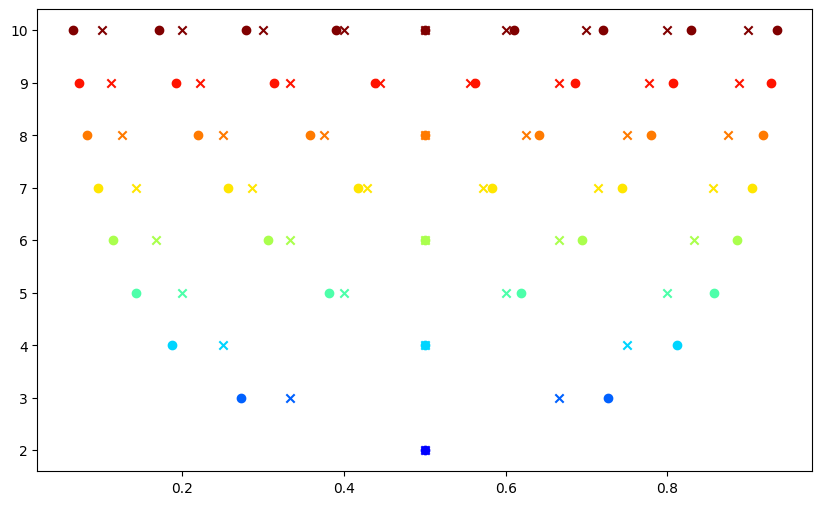

In [184]:
colors = plt.cm.jet(np.linspace(0, 1, 10))
n = 10
plt.figure(figsize=(10, 6))
for idx, i in enumerate(range(1, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    plt.scatter(x_advance,y, color=colors[idx], marker='o' )
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.scatter(x_simple,y, color=colors[idx], marker='x', label=f'Naive {i}' if idx == 0 else "")


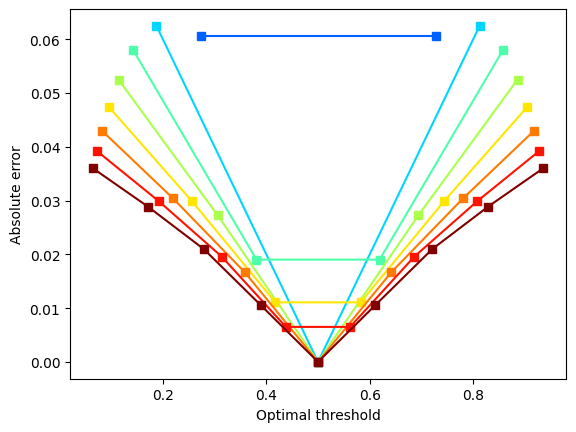

In [186]:
n=10
for idx, i in enumerate(range(1, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.plot(x_advance, np.abs((x_advance-x_simple)), color=colors[idx], marker='s' )
    plt.xlabel('Optimal threshold')
    plt.ylabel('Absolute error')
plt.show()

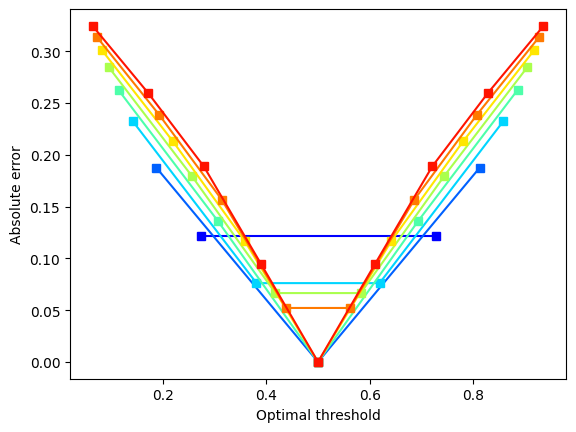

In [188]:
n=10
for idx, i in enumerate(range(2, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.plot(x_advance, np.abs((x_advance-x_simple)/(1/(i-1))), color=colors[idx], marker='s' )
    plt.xlabel('Optimal threshold')
    plt.ylabel('Absolute error')
plt.show()

In [ ]:
i1 = InfinitesimalSort()
i2 = InfinitesimalSort2()

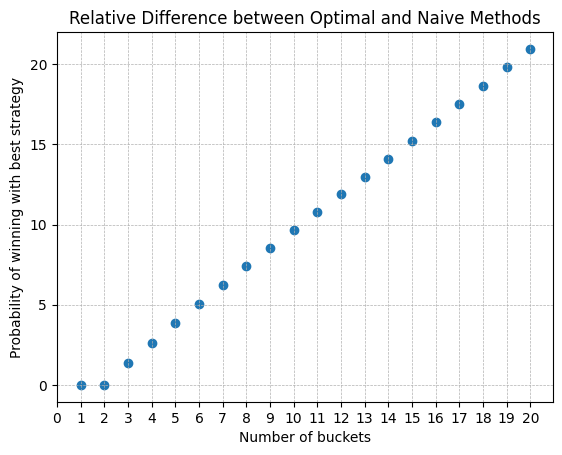

In [37]:
n = 20
x =  range(1, n+1)
optimal = np.array([i1.mP(i) for i in x])
naive = np.array([i2.mP(i) for i in x])

plt.scatter(x, 100*np.abs(naive.astype(float)-optimal.astype(float))/naive.astype(float))
# plt.scatter(x, np.log10(prob2.astype(float)))
# plt.ylim([0,1])
plt.title("Relative Difference between Optimal and Naive Methods")
plt.xlabel('Number of buckets')
plt.ylabel('Probability of winning with best strategy')
plt.xticks(np.arange(0, n+1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
        

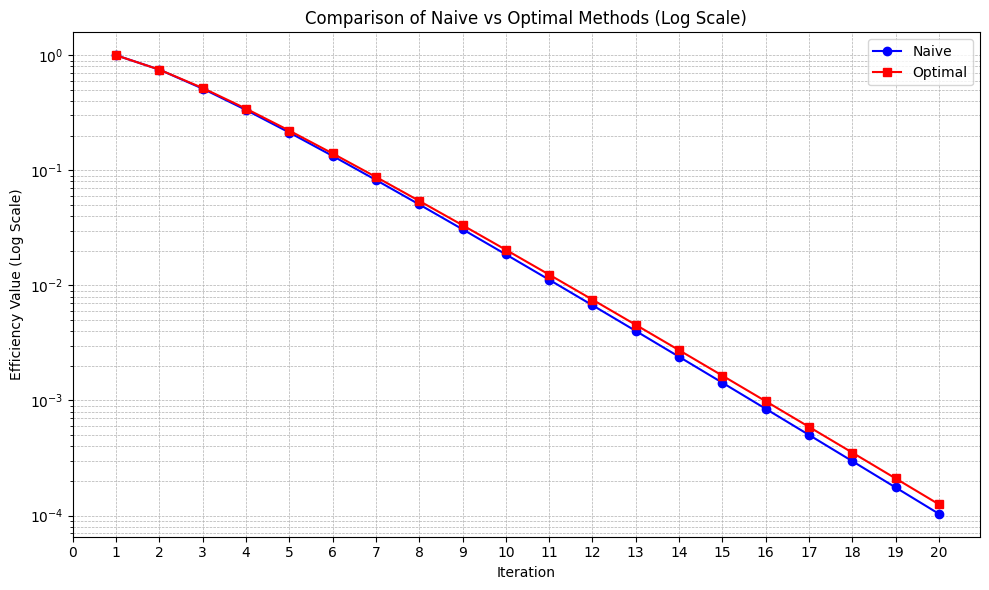

In [38]:
# Plotting the data with y-axis in log scale
plt.figure(figsize=(10, 6))
plt.plot(x, naive, marker='o', label='Naive', linestyle='-', color='blue')
plt.plot(x, optimal, marker='s', label='Optimal', linestyle='-', color='red')

# Setting the y-axis to log scale
plt.yscale('log')

# Adding details
plt.title("Comparison of Naive vs Optimal Methods (Log Scale)")
plt.xlabel("Iteration")
plt.ylabel("Efficiency Value (Log Scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, n+1, 1))
plt.legend()
plt.tight_layout()
plt.show()
